In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

Vamos a resolver la ecuación:

$$
E=\frac{1}{2}(P_x^2,P_y^2)+\frac{1}{2} \alpha P_x^2 - \frac{1+\alpha}{\sqrt{x^2+y^2}}
$$

Donde $x=r\cos(\theta)$, $y=r\sin(\theta)$

Notemos que E no depende del tiempo, entonces:

$$
\frac{dE}{dt}=m \dot{r} . \ddot{r}+\frac{d}{dt}V(r)=m \dot{r} . \ddot{r}+ \nabla V \dot{r} = \dot{r} \ (m\ddot{r}+ \nabla V) = \dot{r} \ (F - F) = 0
$$

In [2]:
def ec_mov(x_p,t,a=0):
    #x_p representa x, y,ypx, py; r32 representa r^(3/2)
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1. + a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r32
    dpy = -(x_p[1]*desv)/r32
    return array([dx,dy,dpx,dpy])

In [3]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [5]:
def Energia(x_p,a):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px *(1.+a)+py*py)-((1. +a)/sqrt(x**2 + y**2))
    return E

In [25]:
def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

### Orbita con Runge kutta

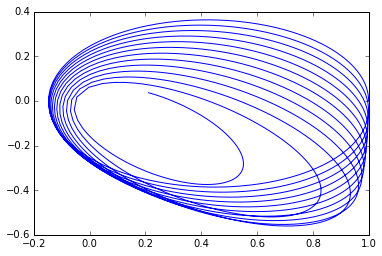

In [4]:
t,sol = rk4(ec_mov,[1,0,0,0.5],[0,30],.05,0.01)
plot(sol[:,0],sol[:,1])
show()

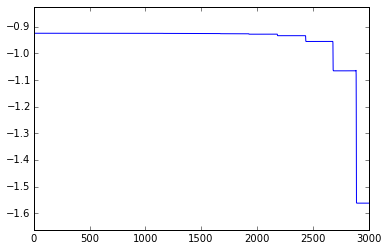

In [6]:
E = Energia(sol,0.05)
ylim([E[-1]-.1,E[0]+.1])
plot(E)

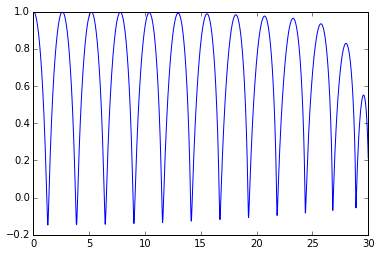

In [7]:
plot(t,sol[:,0])

### Ahora usando los integradores de ODInt

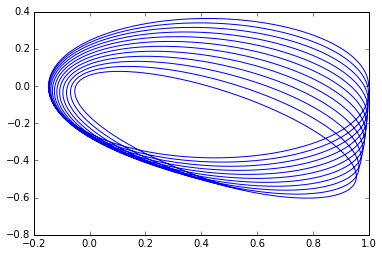

In [8]:
t = linspace(0,30,10000)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])

Notemos que el programa odint da distintos resultados dependiendo de la partición del dominio que estamos usando:

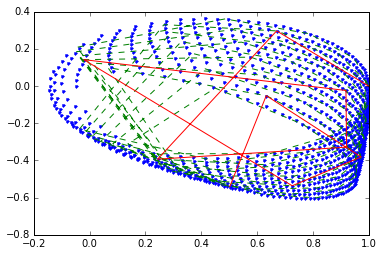

In [9]:
t = linspace(0,30,1000)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1],'.')
t = linspace(0,30,100)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1],'--')
t = linspace(0,30,10)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])

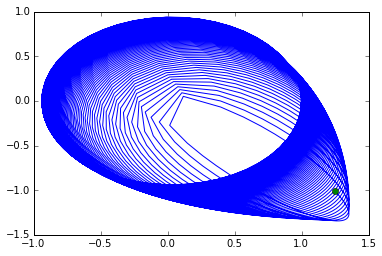

In [56]:
t = linspace(0,2*pi*90,5000)
sol=odeint(ec_mov,[1,0,0,1],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],'o')
show()

Si queremos dar como punto inicial la orbita después de 80 años:

In [11]:
sol[-1,:]

array([ 1.25208126, -1.01455937, -0.23055778,  0.38377312])

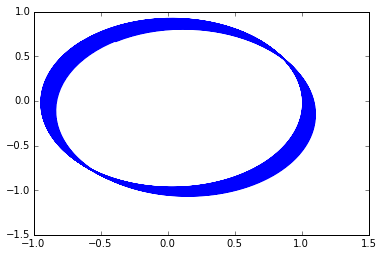

In [55]:
t = linspace(0,2*pi*40,5000)
sol=odeint(ec_mov,sol[-1,:],t,args=(0.05,),rtol=1e-20)
plot(sol[:,0],sol[:,1])
show()

Entonces, la combinación de las dos anteriores es la orbita del planeta durante 130 años

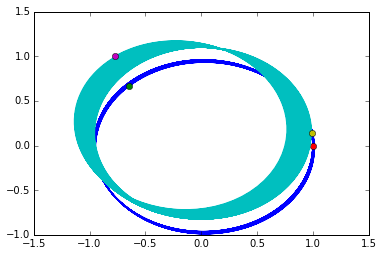

In [78]:
t = linspace(0,2*pi*50,5000)
alpha = 0.03
sol=odeint(ec_mov,[1,0,0,1],t,args=(alpha,),rtol=1e-20)
sol2=odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alpha,),rtol=1e-20)

#r_tol en runge kuta seria el tamaño de h
#queremos ver si trayectorias con datos iniciales similares dan distintos resultados
#nota: el arreglo (el segundo parámetro) tiene como primera entrada a vx y como segunda 
#entrada a vy = sqrt(1-vx^2)

plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],'o'), plot(sol[0,0],sol[0,1],'o')

plot(sol2[:,0],sol2[:,1])
plot(sol2[-1,0],sol2[-1,1],'o'), plot(sol2[0,0],sol2[0,1],'o')

show()

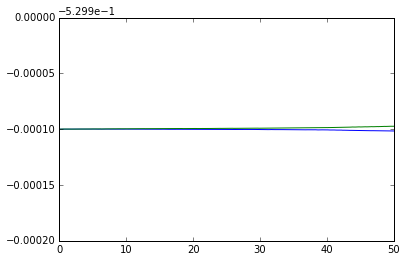

In [79]:
E = Energia(sol,alpha)
E2 = Energia(sol2,alpha)
ylim(E[0]-0.0001,E[0]+0.0001)
plot(t/(2*pi),E)
plot(t/(2*pi),E2)
show()

### Peligro!!!!

La simulación está indicando que la energía aumenta indefinidamente cerca de los 200 años. De hecho... el programa se econtró con una singularidad... y la única singularidad de nuestra ecuación es cuando x=y=0. Entonces los planetas colisionaron!!!

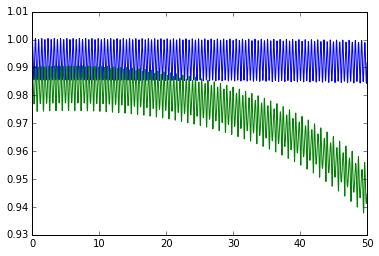

In [81]:
L = L_z(sol)
L2 = L_z(sol2)
plot(t/(2*pi),L)
plot(t/(2*pi),L2)
show()

NOTA: el momento angular no es constante cuando alpha es distinto de cero, ello porque ya no podemos decir que el momento angular es una constante del movimiento 

Para comprobar si las oscilaciones del momento angular tienen que ver con el periodo del planeta

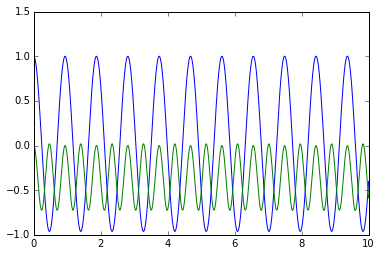

In [48]:
xlim([0,10])
plot(t/(2*pi),sol[:,0])
plot(t/(2*pi),50*(L-1))
show()